# Initial Mess Around

Want to make a three true outcomes leader board, with maybe a would it dong? cross over

In [46]:
from pybaseball import statcast
from pybaseball import playerid_reverse_lookup
from pybaseball import statcast_batter, spraychart

import pandas as pd
import matplotlib.pyplot as plt


In [64]:
# this defaults to yesterday
end_dt = '2022-06-12'

df = statcast(start_dt=end_dt, end_dt=end_dt)

print(df.shape)

This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.28s/it]

(4516, 92)


In [26]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1850,FF,2022-06-12,100.7,-2.25,4.72,"Díaz, Edwin",435559,621242,strikeout,swinging_strike,...,4,4,1,1,4,Standard,Standard,234,-0.005,-0.07
1905,SL,2022-06-12,91.9,-2.22,4.86,"Díaz, Edwin",435559,621242,NaN,ball,...,4,4,1,1,4,Standard,Standard,202,0.0,0.011
1977,SL,2022-06-12,90.4,-2.23,5.06,"Díaz, Edwin",435559,621242,NaN,called_strike,...,4,4,1,1,4,Standard,Standard,231,0.0,-0.023
2027,SL,2022-06-12,91.1,-2.39,5.05,"Díaz, Edwin",435559,621242,NaN,foul,...,4,4,1,1,4,Standard,Standard,210,0.0,-0.017
2060,FF,2022-06-12,99.5,-2.21,4.79,"Díaz, Edwin",501571,621242,strikeout,called_strike,...,4,4,1,1,4,Standard,Standard,230,-0.012,-0.1


In [27]:
df.home_team.value_counts()

CWS    381
PHI    368
KC     354
NYY    346
MIN    328
LAA    293
WSH    293
HOU    290
STL    290
DET    273
SF     265
SD     261
ATL    260
SEA    259
CLE    255
Name: home_team, dtype: int64

In [28]:
df.events.value_counts()

field_out                    454
strikeout                    253
single                       158
walk                          98
double                        50
home_run                      38
grounded_into_double_play     27
force_out                     21
hit_by_pitch                  13
field_error                    9
sac_fly                        9
fielders_choice                9
triple                         7
other_out                      2
double_play                    2
sac_bunt                       1
fielders_choice_out            1
caught_stealing_home           1
Name: events, dtype: int64

In [29]:
tto_events = df.loc[df["events"].isin(["strikeout", "walk", "home_run"])]

In [30]:
tto_events.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1850,FF,2022-06-12,100.7,-2.25,4.72,"Díaz, Edwin",435559,621242,strikeout,swinging_strike,...,4,4,1,1,4,Standard,Standard,234,-0.005,-0.07
2060,FF,2022-06-12,99.5,-2.21,4.79,"Díaz, Edwin",501571,621242,strikeout,called_strike,...,4,4,1,1,4,Standard,Standard,230,-0.012,-0.1
2252,SL,2022-06-12,92.0,-2.37,5.04,"Díaz, Edwin",622110,621242,strikeout,called_strike,...,4,4,1,1,4,Standard,Standard,213,-0.021,-0.299
3110,FF,2022-06-12,96.1,-1.31,5.73,"Iglesias, Raisel",624413,628452,home_run,hit_into_play,...,1,4,1,4,1,Infield shift,Standard,215,-0.047,1.015
3755,FF,2022-06-12,95.7,-1.49,5.56,"Iglesias, Raisel",596019,628452,strikeout,swinging_strike,...,1,3,1,3,1,Infield shift,Standard,220,0.006,-0.134


In [31]:
# ALSO NEED TO GET THE TOTAL OF PA FOR THE GAME!

outcome_counts = tto_events.groupby("batter")["events"].value_counts().unstack(fill_value=0)



In [32]:
outcome_counts.head()

events,home_run,strikeout,walk
batter,,,
405395,0,1,0
408234,0,1,0
435559,0,2,1
443558,0,1,1
457705,1,0,0


In [33]:
three_outcomes = outcome_counts.loc[(outcome_counts["home_run"] > 0) & (outcome_counts["strikeout"] > 0) & (outcome_counts["walk"] > 0)]

# Now try to calculate only three true outcomes

total_counts = df.groupby("batter")["events"].count()

three_outcomes = three_outcomes.merge(total_counts, on='batter', how='left')

three_outcomes

,home_run,strikeout,walk,events
batter,,,,
596059,1,2,1,5
624413,1,1,1,5
664913,1,2,1,4


In [34]:
only_three_outcomes = three_outcomes.loc[three_outcomes[["home_run", "strikeout", "walk"]].sum(axis=1) == three_outcomes["events"]]

In [35]:
only_three_outcomes

,home_run,strikeout,walk,events
batter,,,,
664913,1,2,1,4


In [36]:
player_ids = only_three_outcomes.index

player_names = playerid_reverse_lookup(player_ids, key_type='mlbam')

In [37]:
only_three_outcomes = only_three_outcomes.merge(player_names[["name_first", "name_last", "key_mlbam"]],
                                                left_on='batter',
                                                right_on='key_mlbam',
                                                how="left")

In [65]:
only_three_outcomes["run_date"] = end_dt
only_three_outcomes["has_been_posted"] = False
only_three_outcomes["posted_time"] = None


In [67]:
only_three_outcomes.to_csv("data/tto.csv", mode="w", index = False) 

In [68]:
last_run = pd.read_csv("data/tto.csv")

In [69]:
last_run

,home_run,strikeout,walk,events,name_first,name_last,key_mlbam,has_been_posted,posted_time,run_date
0,1,2,1,4,seth,brown,664913,False,NaN,2022-06-12


In [70]:
last_run.run_date.max()

'2022-06-12'

In [75]:
not_yet_posted.shape

(1, 10)

In [74]:
not_yet_posted = last_run[last_run["has_been_posted"] == False]

if not_yet_posted.shape[0] > 0:
    not_yet_posted.iloc[0]

home_run                    1
strikeout                   2
walk                        1
events                      4
name_first               seth
name_last               brown
key_mlbam              664913
has_been_posted         False
posted_time               NaN
run_date           2022-06-12
Name: 0, dtype: object

In [81]:
last_run.loc[(last_run["key_mlbam"] == 664913) & (last_run["run_date"] == "2022-06-12"), "has_been_posted"] = True
#tto_df[(tto_df["key_mlbam"] == key_mlbam) & (tto_df["run_date"] == run_date)]["posted_time"] = "now"

In [83]:
if None:
    pass
else:
    print("none is false")

none is false


In [82]:
last_run

,home_run,strikeout,walk,events,name_first,name_last,key_mlbam,has_been_posted,posted_time,run_date
0,1,2,1,4,seth,brown,664913,True,NaN,2022-06-12


In [38]:
# double check this!

tto_events.loc[tto_events["batter"].isin(player_ids)]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2443,FF,2022-06-12,96.2,-1.84,5.78,"Stephan, Trevor",664913,663986,home_run,hit_into_play,...,6,3,6,3,6,Infield shift,Standard,227,-0.018,1.029
151,CH,2022-06-12,84.8,-1.48,6.33,"Quantrill, Cal",664913,615698,walk,ball,...,3,1,3,1,3,Infield shift,Standard,227,-0.018,0.078
1012,CH,2022-06-12,86.3,-1.35,6.33,"Quantrill, Cal",664913,615698,strikeout,swinging_strike,...,3,1,3,1,3,Infield shift,Standard,227,0.018,-0.112
2592,FC,2022-06-12,89.1,-1.39,6.39,"Quantrill, Cal",664913,615698,strikeout,swinging_strike,...,0,1,0,1,0,Infield shift,Standard,208,0.009,-0.083


In [39]:
# this is stupid but the plotting is based on team name, not abbreviation

# TODO: double check this! 
abbreviation_to_name = {
    "LAA" : "angels",
    "HOU" : "astros",
    "OAK" : "athletics",
    "TOR" : "blue_jays",
    "ATL" : "braves",
    "MIL" : "brewers",
    "STL" : "cardinals",
    "CHC" : "cubs",
    "AZ" : "diamondbacks",
    "LAD" : "dodgers",
    "SF" : "giants",
    "CLE" : "indians",
    "SEA" : "mariners",
    "MIA" : "marlins",
    "NYM" : "mets",
    "WSH" : "nationals",
    "BAL" : "orioles",
    "SD" : "padres",
    "PHI" : "phillies",
    "PIT" : "pirates",
    "TEX" : "rangers",
    "TB" : "rays",
    "BOS" : "red_sox",
    "CIN" : "reds",
    "COL" : "rockies",
    "KC" : "royals",
    "DET" : "tigers",
    "MIN" : "twins",
    "CWS" : "white_sox",
    "NYY" : "yankees",
    "else" : "generic"
}


C:\Users\matth\anaconda3\envs\three-true-outcomes\lib\site-packages\pybaseball\plotting.py:135: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


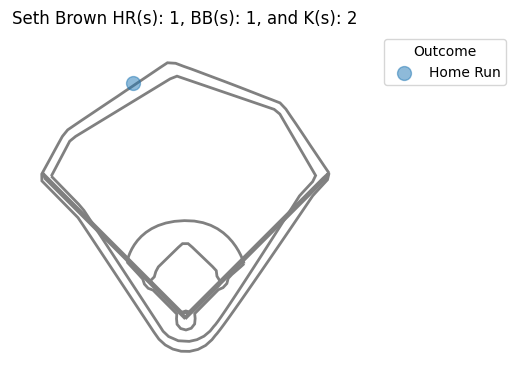

In [61]:
# check if there are none!

for row in only_three_outcomes.iterrows():
    actual_row = row[1]
    
    player_name = actual_row.name_first.capitalize() + " " + actual_row.name_last.capitalize()
        
    sub_data = tto_events.loc[tto_events["batter"] == actual_row.key_mlbam]
    
    # TODO: put all of the things in the title
    title = player_name + " " + "HR(s): " + str(actual_row.home_run) +\
    ", " + "BB(s): " + str(actual_row.walk) + ", and K(s): " + str(actual_row.strikeout)
    
    # Abbreviation
    abbv = sub_data.home_team.iloc[0]
    
    team_nickname = ""
    try:
        team_nickname = abbreviation_to_name[abbv]
    except KeyError:
        team_nickname = abbreviation_to_name["else"]
    
    # Make alt text
    alt="A figure that includes an outline of the {0} stadium with home runs marked. The title reads {1}".format(abbv, title)
    
    # figure out how to save this as png
    ax = spraychart(sub_data, team_nickname, title = title, height = 400, width=400)
        
    ax.figure.savefig("data/image.png", metadata = {"alt" : alt})
    plt.close(fig)    # close the figure window
    


In [18]:
# this is for gut checks

id_to_check = 669242

tto_events.loc[tto_events["batter"] == id_to_check]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
2764,SL,2022-06-04,80.1,-4.37,3.44,"Effross, Scott",669242,664123,strikeout,called_strike,...,5,1,5,1,5,Infield shift,Standard,82,0.052,-0.97
602,SL,2022-06-04,81.7,-1.21,6.72,"Swarmer, Matt",669242,664161,home_run,hit_into_play,...,3,1,3,1,3,Standard,Standard,102,-0.076,1.0
1823,SL,2022-06-04,86.4,-2.82,4.6,"Givens, Mychal",669242,571710,walk,ball,...,3,3,3,3,3,Infield shift,Standard,128,-0.034,0.19
311,FC,2022-06-04,90.4,-1.54,5.72,"Kilian, Caleb",669242,668873,strikeout,called_strike,...,1,3,1,3,1,Infield shift,Standard,183,0.018,-0.158
1821,SI,2022-06-04,91.7,-1.3,5.67,"Kilian, Caleb",669242,668873,walk,ball,...,1,0,1,0,1,Standard,Standard,202,-0.047,0.168
4341,FF,2022-06-04,96.4,-1.58,5.61,"Kilian, Caleb",669242,668873,strikeout,swinging_strike,...,0,0,0,0,0,Infield shift,Standard,198,0.022,-0.141


In [19]:
total_counts[id_to_check]

9

In [20]:
df[df["batter"] == id_to_check].game_pk

2764    663179
2796    663179
2898    663179
2951    663179
3119    663179
3133    663179
602     663179
1628    663179
1647    663179
1679    663179
1733    663179
4579    663179
1803    663152
1854    663152
1909    663152
1947    663152
1823    663152
1856    663152
1898    663152
1945    663152
1978    663152
2031    663152
311     663152
331     663152
361     663152
376     663152
1821    663152
1838    663152
1895    663152
1935    663152
4341    663152
4467    663152
4661    663152
Name: game_pk, dtype: Int64

In [60]:
from mastodon import Mastodon

#   Set up Mastodon

# I think I also need to use os for an access token directly
mastodon = Mastodon(
    access_token = 'token.secret',
    api_base_url = 'https://mast.mastodonsports.social/'
)

media = mastodon.media_post("data/image.png", description=alt)
mastodon.status_post("Shout out to the three true outcome king of the day", media_ids=media)

MastodonNetworkError: Could not complete request: HTTPSConnectionPool(host='mast.mastodonsports.socialdfg', port=443): Max retries exceeded with url: /api/v1/media (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000026A50072D70>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))